# TPC2 Parte C2 - Patricia Salgueiro 

**Questão A: (1 valor) – Explique a metodologia para criar a animação em cada um dos casos
(versões). Comente-as. Justifique

- Versão - gapminder_animation  

Primeiramente importa as bibliotecas que vai utilizar ao longo do desenvolvimento do código, define a cor de fundo como branco e define o tamanho da figura utilizando o termo dpi. 
De seguida vai buscar os dados online e pede ao programa para ler estes dados. 

Destes dados podemos visualizar que temos uma coluna com o nome dos países, referente continente, ano, população, esperança média de vida e o PIB per capita. 

Depois, converteu a coluna [Continente] para uma coluna categorial, em que define cada continente com um número

No código relativamente a animação em si, o autor começa por definir que para cada ano será criado uma imagem com as carateristicas que ele de seguida define, ou seja uma figura com o tamanho de 680x480 dpi. 

Para cada ano será criado um "marcador" situado de acordo com a esperança média de vida e PIB per capita correspondente, em que o seu tamanho será baseado pelo racio do número de população correspondente e agrupados por continente (que foi previamente categorizado, para facilitar reconhecimento), a cor é definida pela colormap "accent", definindo o processamento da imagem atraves do alpha para 0,6, a largura da linha do marcador será de 2 e de cor branca. 

De seguida define a barra y em logistica e nomeia as etiquetas para as barras, sendo a do x "Life Expectancy" e a do y "GDP per Capita", o titulo do Gráfico é "Year: (i)", relembrando que o i no codigo refere-se ao ano referente ao frame apresentado, ou seja o titulo muda a medida que os anos passam, referindo o ano correspondente. O autor do código também define o limite da barra y, que vai desde do 0 até 100000 e da barra x que vai desde 30 para 90 

Este depois guarda as figuras criadas através do código, com o nome Gapminder_step'+str(i)+'.png, relembrando que o (i) é referente ao ano. 

Depois em usando o programa image magic, teriamos que converter com um delay de 80 gapminder as imagens guardadas (frames) para gif, criando assim a animação desejada 

- Versão - gapminder_animation-FuncAnimation_PLOT_SEM-legend

A primeira parte é semelhante a versão anterior, que foi explicada anteriormente. 
O código muda relativamente a conceção da animação. 

Primeiro é guardado os dados da coluna year na variavel anos, por ordem sem repetição. 
Define, de seguida o tamanho de cada imagem (frame) com os mesmos tamanhos que a versão anterior. 
As carateristicas das barras x e y são definidas da mesma forma como explicado anteriormente. 
Define uma funçaõ que carateriza a formação de cada imagem, com as mesmas carateristicas mencionadas anteriormente. 

E em vez de recorrer ao programa image magic, este faz a animação em python com o codigo 
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
Definindo que o número de frames da animação é dado pelo número de anos que existem, dada pela  variavel ano, com o intervalo em cada frame de 200s, não permintindo a repetição da animação. 

E pede para mostrar a animação.


**Questão B) Temos “bolhas” de cinco (5) cores diferentes. O que representa cada
cor? Justifique, com descrição detalhada do processo.

Como mencionado anteriormente as cores das "bolhas", é definida pela caraterização do marcador, em que a cor é categorizada pelo continente, ou seja cada cor é um continente. 
Inicialmente a coluna continente é categorizada, por exemplo Asia passou a ter uma categoria própria como "2" e América outra categoria como "3", no código da animação o marcador é definido c=tmp['continent'].cat.codes, que agrupa as "bolhas" por continente e consequentente, bolhas de cor iguais são do mesmo continente. 

**Questão C) Inserir uma legenda ou legendas com a cor das “bolhas” e o seu
significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as
opções tomadas.

<IPython.core.display.Javascript object>


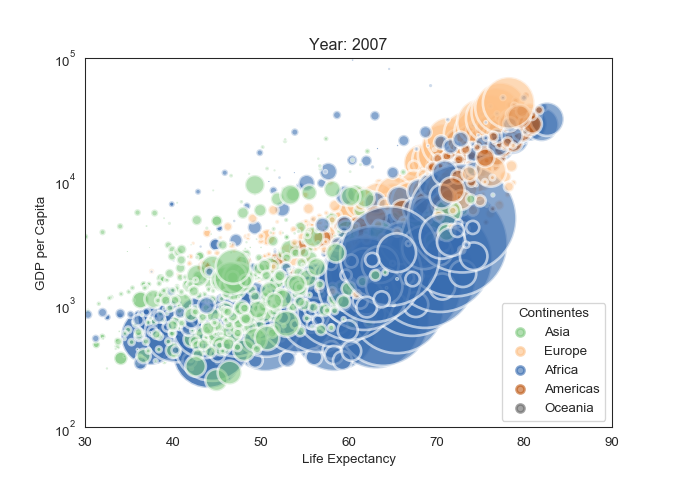

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

anos=data.year.unique()
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    legenda= ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc=4, title= "Continentes")   
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)


    
plt.show()


In [ ]:
#sendo o código para a legenda, definida por: 
 legenda= ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc=4, title= "Continentes")   

#necessário colocar os handles para que a legenda reconheça os elementos configurados